# Introducción breve a la implementación de filtros

La relación de entrada-salida de un filtro (FIR e IIR)[1] aplicado a un vector en el dominio de la transformada Z es una función de transferencia de la siguiente forma:

$$\frac{Y(z)}{X(z)}=\frac{b_{0}+b_{1}z^{-1}+b_2z^{-2}+...+b_mz^{-m}}{1+a_1z^{-1}+a_2z^{-2}+...+a_nz^{-n}}, n\geq m$$

Donde $m$ es el orden del filtro feedback (ceros), $n$ es el orden del filtro feedforward (polos). Si $n\geq m$ se puede asegurar que el sistema será estable, que es condición fundamental para todo tipo de filtro que se desee implementar. 

Dicha función de transferencia se puede expresar como la siguiente ecuación en diferencia.

$$a[0]*y[n] = b[0]*x[n] + b[1]*x[n-1] + ... + b[M]*x[n-M]- a[1]*y[n-1] - ... - a[N]*y[n-N]$$

Se asume que $a[0]=1$ debido a la normalización.

Hay varias formas de implementar (programar) un filtro la forma directa (direct-form implementation) es una de las más conocida, hay muchos más como cascada, paralelos, entre otros[2]. En esta implementación (direct-form), los coeficientes $a_i$ y $b_i$ que son valores reales aparecen como multiplicadores en el diagrama de bloques de la realización de un filtro.
Una variante de direct-form es *direct-form II transposed,* a continuacion se observa el diagrama[3]:

![](iirfilt.gif)

Se la denomina directa porque se trabaja directamente con el numerador y el denominador de la función de transferencia pulso. 

Esta es implementación usada en Matlab en la funcion ̣[`filter()`](https://www.mathworks.com/help/matlab/ref/filter.html) y Python-Scipy [`lfilter()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html). 
La ecuacion en diferencia 

## MATLAB

Extraido de [rosettacode](https://rosettacode.org/wiki/Apply_a_digital_filter_(direct_form_II_transposed)#MATLAB).

``` matlab

signal = [-0.917843918645, 0.141984778794, 1.20536903482, 0.190286794412, -0.662370894973, -1.00700480494, -0.404707073677 ,0.800482325044, 0.743500089861, 1.01090520172, 0.741527555207, 0.277841675195, 0.400833448236, -0.2085993586, -0.172842103641, -0.134316096293, 0.0259303398477, 0.490105989562, 0.549391221511, 0.9047198589];
a = [1.00000000, -2.77555756e-16, 3.33333333e-01, -1.85037171e-17];
b = [0.16666667, 0.5, 0.5, 0.16666667];
 
out = filter(b,a,signal)
 
figure
subplot(1,2,1)
stem(0:19, signal)
xlabel('n')
title('Original Signal')
 
subplot(1,2,2)
stem(0:19, out)
xlabel('n')
title('Filtered Signal')

```

## PYTHON -SCIPY

Extraido de [rosettacode](https://rosettacode.org/wiki/Apply_a_digital_filter_(direct_form_II_transposed)#Python).

[-0.15297399 -0.43525783 -0.1360434   0.69750333  0.65644469 -0.43548245
 -1.08923946 -0.53767655  0.51704999  1.05224975  0.9618543   0.69569009
  0.4243563   0.19626223 -0.02783512 -0.21172192 -0.17474556  0.06925841
  0.38544587  0.65177084]


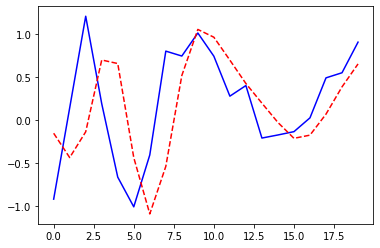

In [1]:
from __future__ import print_function
from scipy import signal
import matplotlib.pyplot as plt
 
if __name__=="__main__":
	sig = [-0.917843918645,0.141984778794,1.20536903482,0.190286794412,-0.662370894973,-1.00700480494,
		-0.404707073677,0.800482325044,0.743500089861,1.01090520172,0.741527555207,
		0.277841675195,0.400833448236,-0.2085993586,-0.172842103641,-0.134316096293,
		0.0259303398477,0.490105989562,0.549391221511,0.9047198589]
 
	#Create an order 3 lowpass butterworth filter
	#Generated using b, a = signal.butter(3, 0.5)
	a = [1.00000000, -2.77555756e-16, 3.33333333e-01, -1.85037171e-17]
	b = [0.16666667, 0.5, 0.5, 0.16666667]
 
	#Apply the filter to signal
	filt = signal.lfilter(b, a, sig)
	print (filt)
 
	plt.plot(sig, 'b')
	plt.plot(filt, 'r--')
	plt.show()


## Referencia
1. Oppenheim, Alan V., Ronald W. Schafer, and John R. Buck. Discrete-Time Signal Processing. Upper Saddle River, NJ: Prentice-Hall, 1999. 
2. https://en.wikipedia.org/wiki/Digital_filter#Filter_realization
3. https://www.dsprelated.com/freebooks/filters/